In [5]:
import pandas as pd
data = pd.read_csv("/content/sample_data/Malware_dataset.csv")

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

print(data.columns)
data=data.drop(columns=['hash'])
data=data.drop(31324,axis=0)
print(data.columns)

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')
Index(['millisecond', 'classification', 'state', 'usage_counter', 'prio',
       'static_prio', 'normal_prio', 'policy', 'vm_pgoff', 'vm_truncate_count',
       'task_size', 'cached_hole_size', 'free_area_cache', 'mm_users',
       'map_count', 'hiwater_rss', 'total_vm', 'shared_vm', 'exec_vm',
       'reserved_vm', 'nr_ptes', 'end_data', 'last_interval', 'nvcsw',
       'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock', 'utime',
       'stime', 'gtime', 'cgtime',

In [8]:
label=LabelEncoder()
data['classification']=label.fit_transform(data['classification'])
print("원래 레이블: ")
print(data['classification'].unique())

print("\n인코딩 후 레이블: ")
print(label.classes_)


원래 레이블: 
[1 0]

인코딩 후 레이블: 
['benign' 'malware']


In [12]:
X=data.drop(columns=['classification'])
Y=data['classification']

# Combine X and Y to drop rows with NaNs consistently
combined_data = pd.concat([X, Y], axis=1)
combined_data = combined_data.dropna()

X = combined_data.drop(columns=['classification'])
Y = combined_data['classification']

print(X)
print(Y)

       millisecond  state  usage_counter        prio  static_prio  \
0                0      0              0  3069378560        14274   
1                1      0              0  3069378560        14274   
2                2      0              0  3069378560        14274   
3                3      0              0  3069378560        14274   
4                4      0              0  3069378560        14274   
...            ...    ...            ...         ...          ...   
72596          596      0              0  3069706240        14020   
72597          597      0              0  3069706240        14020   
72598          598      0              0  3069706240        14020   
72599          599      0              0  3069706240        14020   
72600          600      0              0  3069706240        14020   

       normal_prio  policy  vm_pgoff  vm_truncate_count  task_size  ...  \
0                0       0         0              13173          0  ...   
1                0   

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [14]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [15]:
Y_pred=knn.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print("정확도: ",accuracy)

정확도:  0.9982093663911846


In [16]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)


DecisionTreeClassifier()

In [17]:
Y_pred=decision_tree.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print("정확도: ",accuracy)

정확도:  1.0


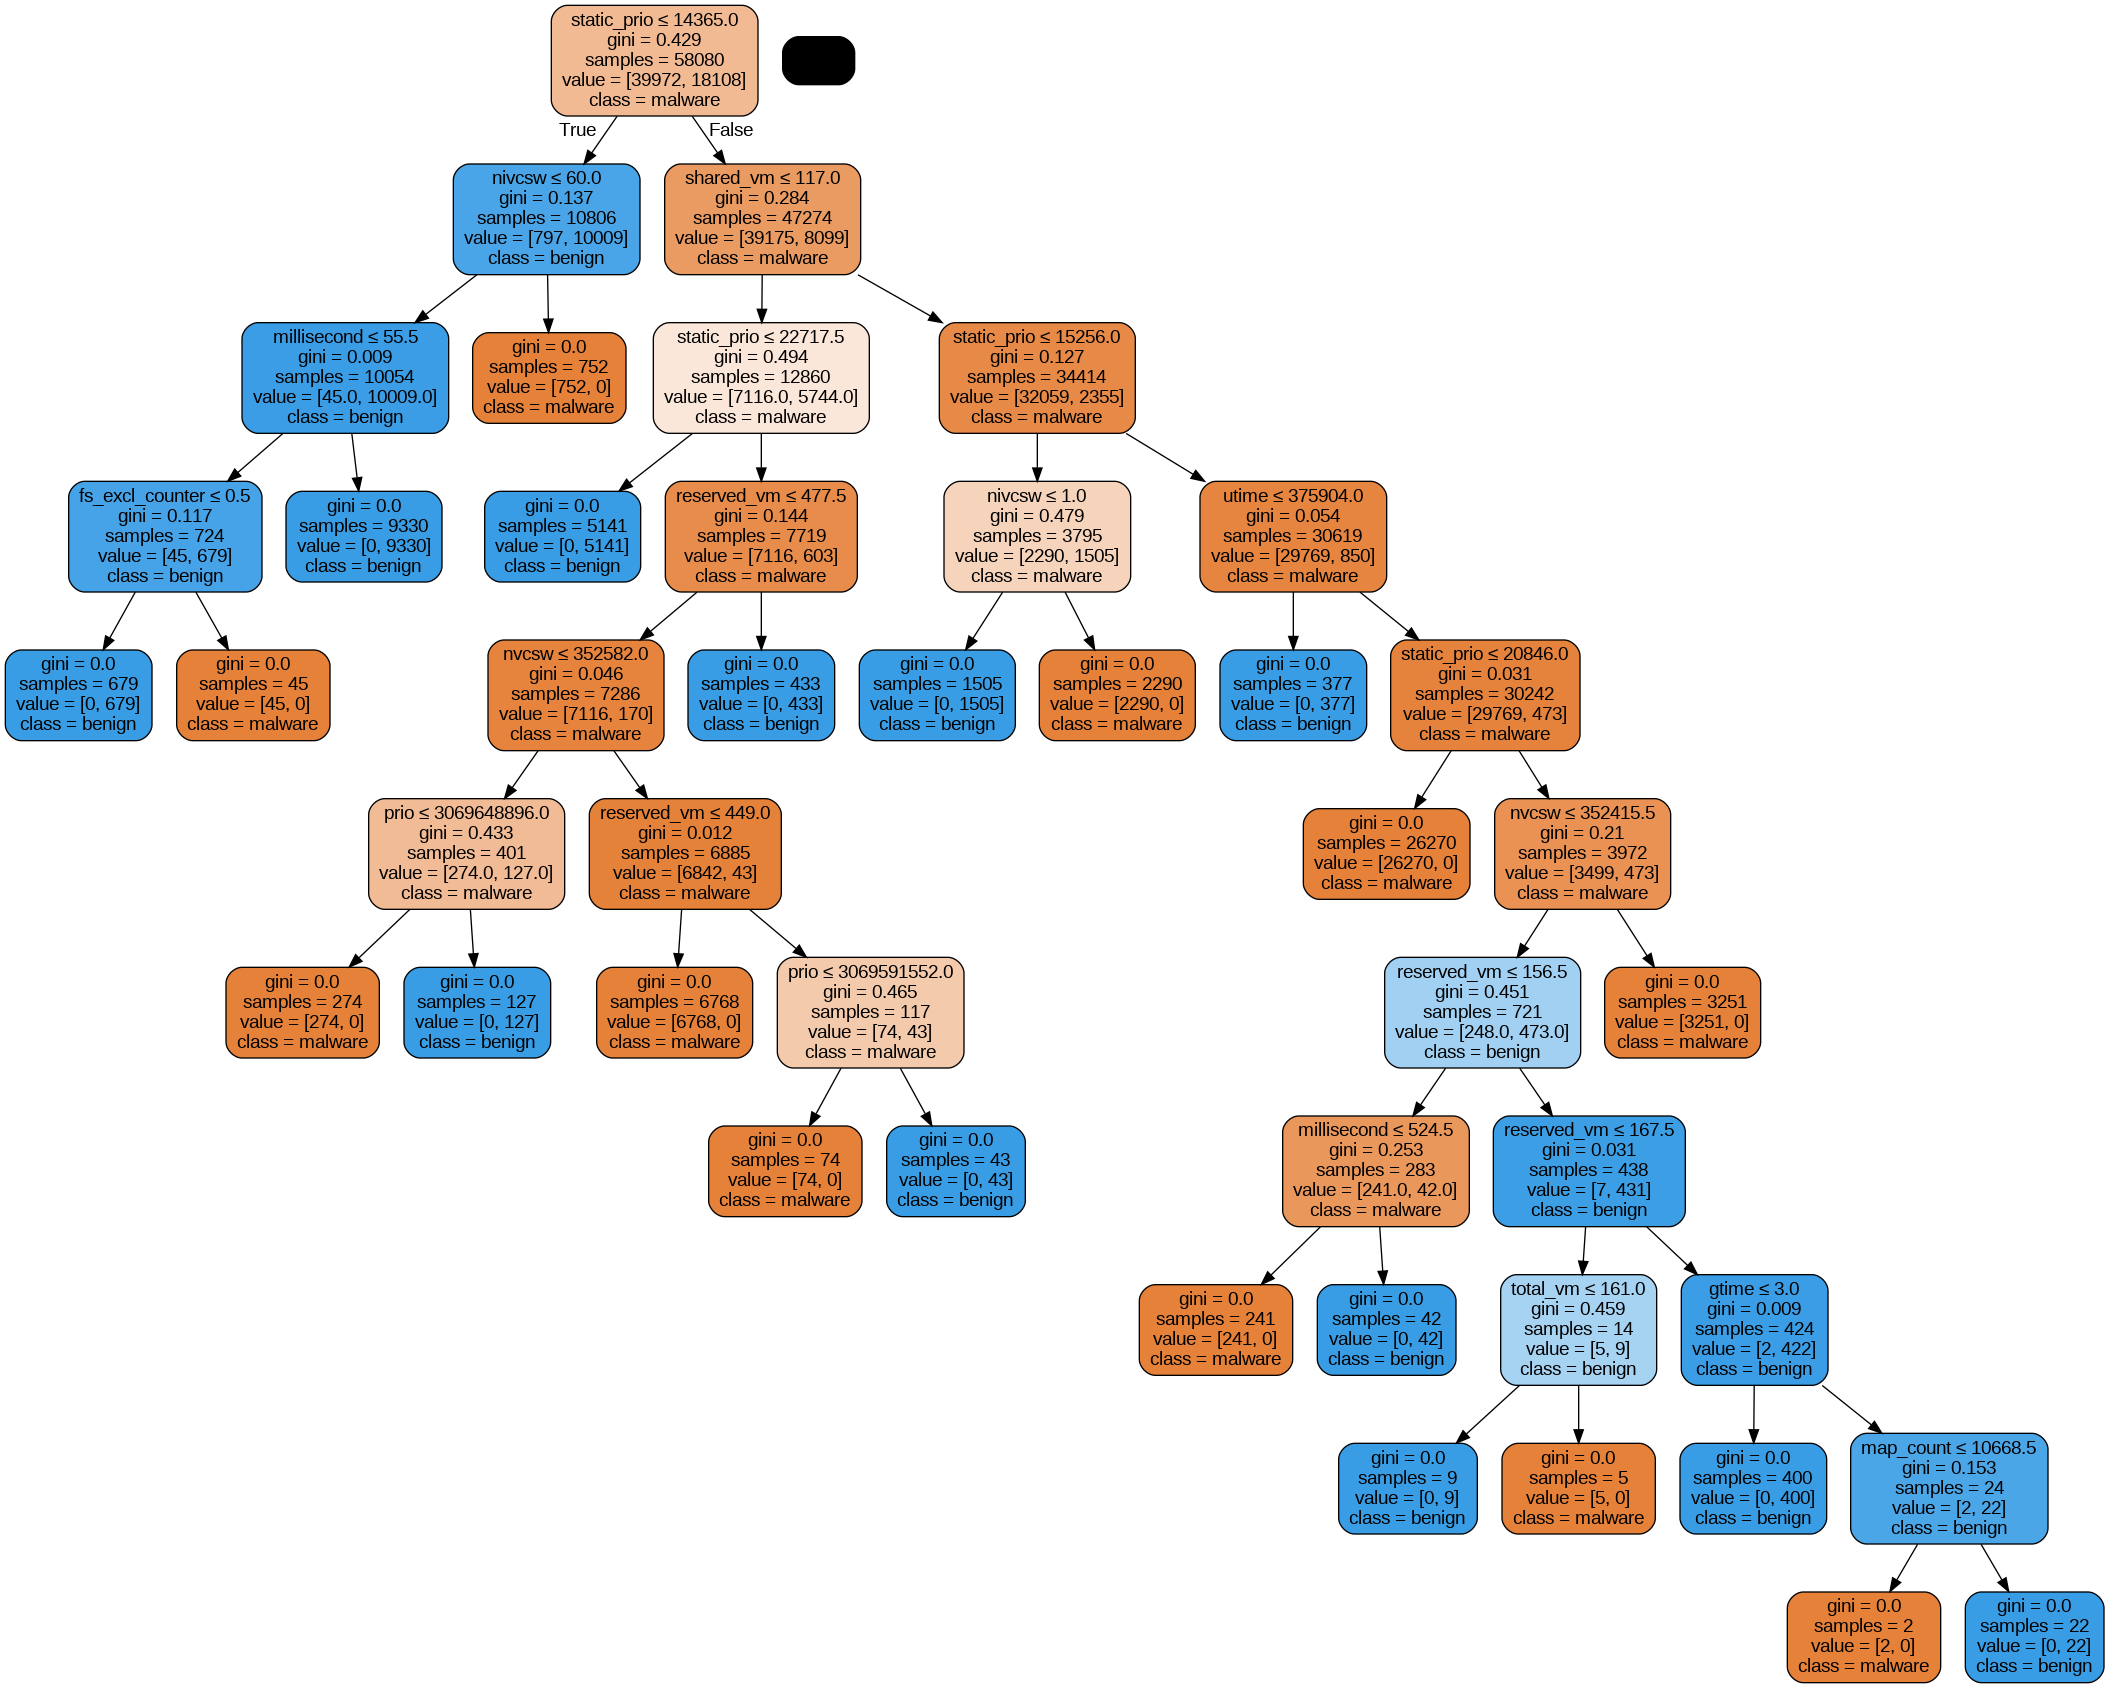

In [18]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dt=export_graphviz(decision_tree,out_file=None,
                   feature_names=X.columns,
                   class_names=['malware','benign'],
                   filled=True,rounded=True,
                   special_characters=True)
graph=pydotplus.graph_from_dot_data(dt)
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [21]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model=Sequential([
    Conv1D(filters=64,kernel_size=3,activation='relu',input_shape=(X_train.shape[1],1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 31, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        61,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,825 (241.50 KB)

 Trainable params: 61,825 (241.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
X_train=X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test=X_test.reshape((X_test.shape[0],X_test.shape[1],1))

In [24]:
CNN=model.fit(X_train,Y_train,epochs=5,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/5
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.9341 - loss: 0.1740 - val_accuracy: 0.9991 - val_loss: 0.0059
Epoch 2/5
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9959 - loss: 0.0172 - val_accuracy: 0.9994 - val_loss: 0.0043
Epoch 3/5
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9969 - loss: 0.0115 - val_accuracy: 0.9995 - val_loss: 0.0016
Epoch 4/5
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 46s 14ms/step - accuracy: 0.9977 - loss: 0.0078 - val_accuracy: 0.9997 - val_loss: 0.0013
Epoch 5/5
1815/1815 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9987 - loss: 0.0052 - val_accuracy: 0.9999 - val_loss: 5.9758e-04


In [25]:
loss,accuracy=model.evaluate(X_test,Y_test)
print("정확도: ",accuracy)

454/454 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 5.4113e-04
정확도:  0.9999311566352844
